# Feature selection - Feature Importance with Random Forest

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine

#Load data
dataObj = load_wine()
X = dataObj.data
y = dataObj.target
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardization
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [2]:
from sklearn.ensemble import RandomForestClassifier

#Create objects 
forest = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)

#Training
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)

In [3]:
# Extract importance measure
importances = forest.feature_importances_

# Column names
cols = np.array(dataObj.feature_names)

# Sort array from based on importances from large to small
idxs = np.argsort(importances)[::-1]
importances = importances[idxs]
cols2 = cols[idxs]

# Print results
for count, (col, importance) in enumerate(zip(cols2, importances)):
    print(f"{count+1:2d}) {col:30s} \t{importance:5.3f}")

 1) color_intensity                	0.197
 2) proline                        	0.159
 3) flavanoids                     	0.147
 4) od280/od315_of_diluted_wines   	0.136
 5) alcohol                        	0.105
 6) hue                            	0.069
 7) total_phenols                  	0.058
 8) alcalinity_of_ash              	0.030
 9) proanthocyanins                	0.024
10) malic_acid                     	0.024
11) magnesium                      	0.021
12) nonflavanoid_phenols           	0.017
13) ash                            	0.013


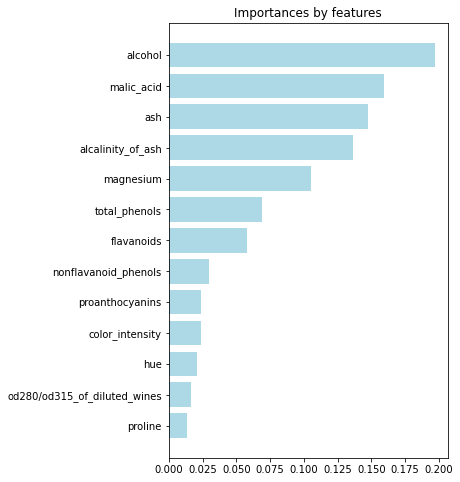

In [4]:
#Reverse the order for plotting
cols2 = cols[::-1]
importances2 = importances[::-1]

#Plotting
fig, ax = plt.subplots(figsize=(5,8))
ax.barh(cols2,importances2,  color='lightblue')
ax.set_title('Importances by features')
plt.show()

### Using Feature Selection object in SKL

In [5]:
from sklearn.feature_selection import SelectFromModel

#Create object
sfm = SelectFromModel(forest, threshold=0.1)

# Training
sfm.fit(X_train, y_train)

# Columns chosen
cols_bool = sfm.get_support()

# Extract importances values
importances = sfm.estimator_.feature_importances_

# Select only chosen columns
cols_reduced = cols[cols_bool]
importances = importances[cols_bool]

In [6]:
# Sort array from based on importances from large to small
idxs = np.argsort(importances)[::-1]
importances = importances[idxs]
cols_reduced = cols_reduced[idxs]

# Print results
for count, (col, importance) in enumerate(zip(cols_reduced, importances)):
    print(f"{count+1:2d}) {col:30s} \t{importance:5.3f}")

 1) color_intensity                	0.197
 2) proline                        	0.159
 3) flavanoids                     	0.147
 4) od280/od315_of_diluted_wines   	0.136
 5) alcohol                        	0.105


In [7]:
# Transform X
X_selected = sfm.transform(X_train)

print(X_selected.shape)

(124, 5)
